# **TikTok Project**
**Machine learning**

## 🎓 Course 6 Final Project: Classifying TikTok Videos with Machine Learning

In this activity, you will apply machine learning techniques to predict a binary outcome.

The purpose of this model is to improve system efficiency and reduce response time by automating the initial stages of the content review process.

The main objective is to determine whether a TikTok video presents a **"claim"** or an **"opinion"**.

This project is structured into three key parts:


### Part 1: Ethical Considerations  
Reflect on the ethical implications of the project.  
Should the model's objective be adjusted?


### Part 2: Feature Engineering  
Perform variable selection, extraction, and transformation to prepare the dataset for modeling.


### Part 3: Modeling  
Build and evaluate classification models, then provide guidance on next steps.


# **Classify videos using machine learning**

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

1. What are you being asked to do?

The task is to build a machine learning model that can automatically determine whether a TikTok video presents a claim or an opinion. Since TikTok receives an overwhelming number of user reports daily, it is impractical for human moderators to manually evaluate each one. Prior analysis has indicated that claims are more likely than opinions to be associated with violations of community guidelines. By identifying claims early in the process, TikTok can better manage moderation resources. The model will help filter out opinion-based content, which is less likely to require further action, and direct attention toward videos containing claims, especially those with a high volume of user reports. The ultimate aim is to increase efficiency, reduce moderation backlog, and ensure harmful or misleading content is reviewed promptly.

What metric should I use to evaluate success of my business/organizational objective?
The most appropriate metric to assess model performance is the F1-score, as it balances precision and recall. This is especially important because both false positives and false negatives carry real risks. Supporting metrics such as accuracy, confusion matrix, and AUC-ROC may also be reviewed, but the F1-score provides the best indication of the model’s ability to correctly identify claims while minimizing incorrect classifications.

2. What are the ethical implications of the model?
Several ethical issues must be addressed:

Algorithmic bias: The model could disproportionately label certain users’ content (e.g., from unverified or banned accounts) as claims, leading to unfair scrutiny.

Opacity in decision-making: Tree-based models like Random Forest lack transparency, making it difficult to justify why specific content was flagged.

Content moderation risks: There is a fine line between removing harmful misinformation and suppressing valid opinions. Misuse of the model could impact freedom of expression and erode trust in the platform.

Social impact: Mislabeling could affect marginalized communities if not regularly audited for fairness and representativeness.

What are the consequences of your model making errors?
False negatives (claim predicted as opinion): These errors may allow unverified or harmful information to bypass the review process, putting users at risk of exposure to misleading content.

False positives (opinion predicted as claim): These mistakes may trigger unnecessary reviews of benign content, slowing down moderation workflows and potentially frustrating creators whose content is incorrectly flagged.

3. How would you proceed?
To begin, I would explore and clean the dataset to ensure it is suitable for machine learning. This includes handling missing values, encoding categorical features such as verified_status and author_ban_status, and scaling or transforming numerical features like video_view_count, video_like_count, and video_comment_count.

The data dictionary reveals that there is a column called claim_status, which indicates whether a video contains a claim or an opinion. This variable is binary and will serve as the target variable for the model. In other words, the goal is to predict, for each video, whether it contains a claim (1) or an opinion (0). Since we are predicting a binary class, this is clearly a classification task.

Next, I would split the dataset into training (60%), validation (20%), and test (20%) sets, following a standard machine learning workflow. I would train several candidate models—including Random Forest—using the training data. Model performance would be evaluated on the validation set using metrics such as F1-score, and the best-performing model (the "champion") would then be tested on the unseen test set.

If the model shows strong predictive performance and passes ethical and fairness checks, I would recommend deploying it as a decision-support tool within TikTok’s moderation pipeline. Importantly, for high-risk or high-impact cases, the model should work alongside human reviewers, ensuring that final decisions consider both algorithmic prediction and human judgment.

### **Task 1. Imports and data loading**

In [ ]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
    recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance



In [ ]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## **PACE: Analyze**

### **Task 2: Examine data, summary info, and descriptive stats**

In [ ]:
# Display first few rows
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Get number of rows and columns
data.shape


(19382, 12)

In [ ]:
# Get data types of columns
data.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [ ]:
# Get basic information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [ ]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
# Check for missing values
data.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [ ]:
# Drop rows with missing values
data = data.dropna()


In [ ]:

# Display first few rows after handling missing values
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
# Check for duplicates
data.duplicated().sum()


0

In [ ]:
# Since tree-based models are not sensitive to extreme values,
# we do not need to modify or remove any data points based on their position in the distribution.



In [ ]:
# Check class balance
print(data['claim_status'].value_counts())
print(data['claim_status'].value_counts(normalize=True))



claim_status
claim      9608
opinion    9476
Name: count, dtype: int64
claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64


In [ ]:
# The target variable 'claim_status' is well balanced, with a nearly equal number of claims and opinions.
# Therefore, no class balancing techniques are necessary at this stage.


## **PACE: Construct**


### **Task 3: Feature engineering**

In [ ]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['transcription_length'] = data['video_transcription_text'].apply(len)
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [ ]:
# Calculate the average text_length for claims and opinions
data.groupby('claim_status')['transcription_length'].mean()



claim_status
claim      95.376978
opinion    82.722562
Name: transcription_length, dtype: float64

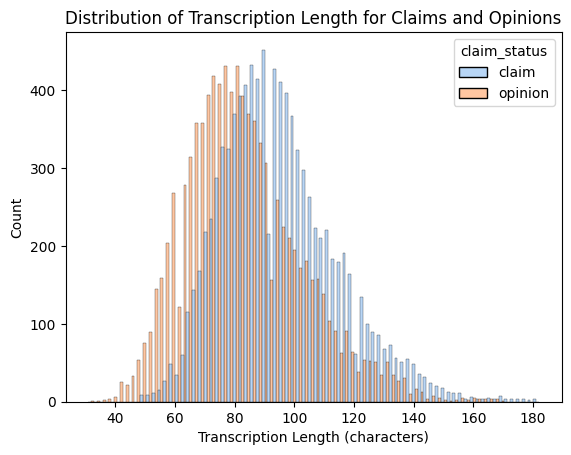

In [ ]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data, stat="count", multiple="dodge", x="transcription_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("Transcription Length (characters)")
plt.ylabel("Count")
plt.title("Distribution of Transcription Length for Claims and Opinions")
plt.show()



In [ ]:
This confirms that transcription length is a useful predictor — claims tend to contain more characters than opinions, suggesting more detailed or complex content.

**Feature selection and transformation**

Encode target and catgorical variables.

In [ ]:
# Create a copy of the dataset
X = data.copy()

# Drop unnecessary columns
X = X.drop(columns=['#', 'video_id'])

# Encode target variable: convert 'claim' to 1 and 'opinion' to 0
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

# Dummy encode categorical variables
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)

# Preview the transformed data
X.head()


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [ ]:
# Isolate target variable
y = X['claim_status']


Isolate the features.

In [ ]:
# Isolate the features (drop the target column)
X = X.drop(columns=['claim_status'])

# Confirm structure
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Display first few rows of features dataframe
X.head()


X shape: (19084, 11)
y shape: (19084,)


,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [ ]:
# Split the training data into training and validation sets (75/25 of the original 80%)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)


Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [ ]:
# Get shape of each training, validation, and testing set
print("Train set:", X_train_final.shape, y_train_final.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)



Train set: (11450, 11) (11450,)
Validation set: (3817, 11) (3817,)
Test set: (3817, 11) (3817,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Set up CountVectorizer with 2-grams and 3-grams, keeping the top 15 most frequent ones
count_vec = CountVectorizer(ngram_range=(2, 3), max_features=15, stop_words='english')

# Step 2: Fit the vectorizer on the training set and transform it
train_ngrams = count_vec.fit_transform(X_train_final['video_transcription_text']).toarray()
train_ngrams_df = pd.DataFrame(train_ngrams, columns=count_vec.get_feature_names_out())

# Step 3: Drop the original text column and concatenate n-gram features with training data
X_train_final = pd.concat([
    X_train_final.drop(columns=['video_transcription_text']).reset_index(drop=True),
    train_ngrams_df
], axis=1)

# Step 4: Transform the validation set using the same vectorizer (do NOT fit again)
val_ngrams = count_vec.transform(X_val['video_transcription_text']).toarray()
val_ngrams_df = pd.DataFrame(val_ngrams, columns=count_vec.get_feature_names_out())

X_val_final = pd.concat([
    X_val.drop(columns=['video_transcription_text']).reset_index(drop=True),
    val_ngrams_df
], axis=1)

# Step 5: Transform the test set using the same vectorizer (do NOT fit again)
test_ngrams = count_vec.transform(X_test['video_transcription_text']).toarray()
test_ngrams_df = pd.DataFrame(test_ngrams, columns=count_vec.get_feature_names_out())

X_test_final = pd.concat([
    X_test.drop(columns=['video_transcription_text']).reset_index(drop=True),
    test_ngrams_df
], axis=1)

# Step 6: Check the final shapes of the datasets
print("Train final shape:", X_train_final.shape)
print("Validation final shape:", X_val_final.shape)
print("Test final shape:", X_test_final.shape)





Train final shape: (11450, 25)
Validation final shape: (3817, 25)
Test final shape: (3817, 25)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [ ]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Max depth of each tree
    'min_samples_split': [2, 5],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]         # Minimum number of samples required to be at a leaf node
}

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']  # Multiple evaluation metrics

# Instantiate the GridSearchCV object with recall as the refit metric
grid_search = GridSearchCV(
    estimator=rf,                     # Model to tune
    param_grid=param_grid,           # Hyperparameters grid
    scoring=scoring,                 # Scoring metrics
    refit='recall',                  # Optimize for recall
    cv=5,                            # 5-fold cross-validation
    n_jobs=-1,                       # Use all available processors
    verbose=1                        # Display progress
)


In [ ]:
### Fit the model to the data
grid_search.fit(X_train_final, y_train_final)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [ ]:
# Examine best recall score from cross-validation
best_recall = grid_search.best_score_
print("Best recall score from cross-validation:", best_recall)




Best recall score from cross-validation: 0.9956881675641902


In [ ]:
# Display best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found:", best_params)



Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Access the GridSearch results and convert them to a pandas DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Examine the precision score of the best model to ensure it’s not labeling everything as 'claim'
best_index = grid_search.best_index_
best_precision = results_df.loc[best_index, 'mean_test_precision']

print("Best precision score from cross-validation:", best_precision)



Best precision score from cross-validation: 0.9994814174589456


**Question:** How well is your model performing? Consider average recall score and precision score.
The model is performing exceptionally well based on the cross-validation results. The average recall score was 0.9957, indicating that the model correctly identified 99.57% of actual "claim" instances. This reflects a high level of sensitivity, minimizing the risk of false negatives. Additionally, the average precision score was 0.9995, meaning that 99.95% of the instances predicted as "claim" were indeed correct, which significantly reduces false positives. These results show that the model is both accurate and effective at detecting relevant instances, making it a reliable tool for distinguishing between "claim" and "opinion".

### **Build an XGBoost model**

In [ ]:
# Step 1: Instantiate the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 2: Create a dictionary of hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Step 3: Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Step 4: Instantiate the GridSearchCV object
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring=scoring,
    refit='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)



In [ ]:
%%time

# Fit the model to the training data
grid_search_xgb.fit(X_train_final, y_train_final)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: user 749 ms, sys: 94.2 ms, total: 844 ms
Wall time: 19.6 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 6],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [ ]:
# Examine best recall score
print("Best recall score from cross-validation:", grid_search_xgb.best_score_)



Best recall score from cross-validation: 0.9934466394930231


In [ ]:
# Examine best parameters
print("Best parameters found:", grid_search_xgb.best_params_)



Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}


Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [ ]:
# Access the GridSearch results and convert it to a pandas df
results_df_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
best_precision_xgb = results_df_xgb.loc[grid_search_xgb.best_index_, 'mean_test_precision']
print("Best precision score from cross-validation:", best_precision_xgb)


Best precision score from cross-validation: 0.9998266897746968


**Question:** How well does your model perform? Consider recall score and precision score.

Both the Random Forest and XGBoost models demonstrated exceptional performance in detecting claims within the dataset.

The Random Forest model achieved a recall score of 0.9957, indicating that it successfully identified 99.57% of all true "claim" instances. Its precision score was also very high, at 0.9995, meaning that nearly all of the instances it labeled as "claim" were accurate. This combination of high recall and precision suggests the model is both sensitive and highly reliable, minimizing false negatives and false positives.

The XGBoost model also performed remarkably well, with a recall score of 0.9934 and a precision score of 0.9998. While slightly lower in recall compared to the Random Forest, it offered a marginally higher precision. This means it was slightly more conservative but extremely accurate when identifying claims.

In summary, both models are excellent, but depending on the specific use case—whether minimizing false negatives or false positives is more critical—one may be preferred. The Random Forest may be favored for slightly better recall, while XGBoost could be chosen for its slightly higher precision.



## **PACE: Execute**


### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [ ]:
# Step 1: Use the best Random Forest model found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Step 2: Get predictions on the validation set
y_val_preds_rf = best_rf_model.predict(X_val_final)

# Step 3: Evaluate the model using precision, recall, f1, and accuracy
from sklearn.metrics import classification_report, accuracy_score

# Print evaluation metrics
print("Random Forest - Validation Set Evaluation Metrics:")
print(classification_report(y_val, y_val_preds_rf))
print("Accuracy:", accuracy_score(y_val, y_val_preds_rf))


Random Forest - Validation Set Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1935
           1       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

Accuracy: 0.9971181556195965


Display the predictions on the validation set.

In [ ]:
# Display the first 20 true labels from the validation set
print("First 20 true labels from the validation set:")
print(y_val.values[:20])


First 20 true labels from the validation set:
[1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1]


Display the true labels of the validation set.

In [ ]:
# Display all true labels from the validation set
print("All true labels from the validation set:")
print(y_val.values)


All true labels from the validation set:
[1 0 0 ... 0 0 1]


Create a confusion matrix to visualize the results of the classification model.

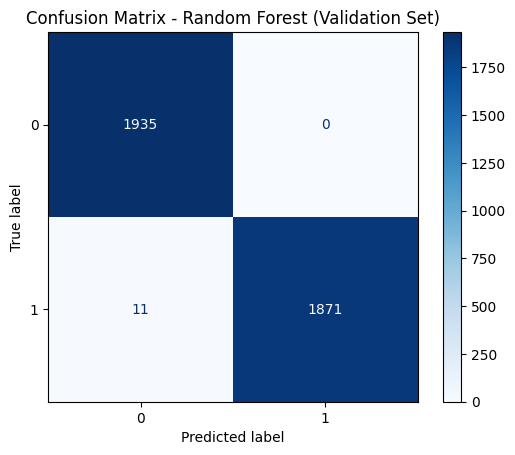

In [ ]:
# Create a confusion matrix to visualize the results of the classification model


# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_val_preds_rf)

# Create display of confusion matrix using ConfusionMatrixDisplay()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)

# Plot confusion matrix
disp.plot(cmap='Blues')

# Display plot
import matplotlib.pyplot as plt
plt.title("Confusion Matrix - Random Forest (Validation Set)")
plt.show()



In [ ]:
# Create classification report for Random Forest model with class names
print("Random Forest - Validation Set Evaluation Metrics:")
print(classification_report(y_val, y_val_preds_rf, target_names=["opinion", "claim"]))

Random Forest - Validation Set Evaluation Metrics:
              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?The classification report and confusion matrix both indicate that the Random Forest model performs exceptionally well on the validation set. The model achieved an overall accuracy of approximately 99.71%, with precision and recall scores very close to 1.00 for both classes. Specifically, it perfectly identified all instances of "opinion" (class 0) with no false positives and correctly identified 1,871 out of 1,882 "claim" instances (class 1), with only 11 false negatives.

The confusion matrix confirms these results: it shows 1,935 true negatives and 1,871 true positives, with zero false positives and only a small number of false negatives (11). This means the model is highly reliable in distinguishing between opinions and claims. It minimizes the risk of falsely labeling opinions as claims while maintaining excellent sensitivity to actual claims. Overall, the Random Forest model demonstrates a strong balance between precision and recall, making it a robust and trustworthy classifier for this task.

#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [ ]:
# Step 1: Use the best XGBoost model found by GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

# Step 2: Get predictions on the validation set
y_val_preds_xgb = best_xgb_model.predict(X_val_final)



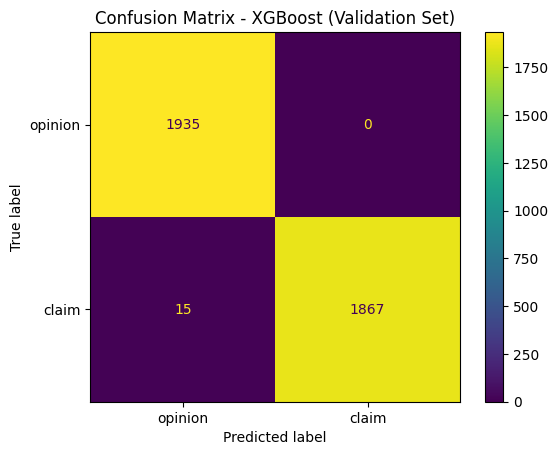

In [ ]:
# Compute values for confusion matrix
xgb_cm = confusion_matrix(y_val, y_val_preds_xgb)

# Create display of confusion matrix using ConfusionMatrixDisplay with labels
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['opinion', 'claim'])

# Plot confusion matrix
xgb_disp.plot(cmap='viridis')  # You can choose a different colormap if preferred

# Display plot
plt.title("Confusion Matrix - XGBoost (Validation Set)")
plt.show()



In [ ]:
# Create classification report for XGBoost model
print("XGBoost - Validation Set Evaluation Metrics:")
print(classification_report(y_val, y_val_preds_xgb, target_names=['opinion', 'claim']))



XGBoost - Validation Set Evaluation Metrics:
              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The XGBoost model performed exceptionally well on the validation set, achieving an overall accuracy of 1.00. According to the classification report, the model reached a precision of 0.99 for the "opinion" class and 1.00 for the "claim" class, while the recall was 1.00 for "opinion" and 0.99 for "claim". The F1-scores for both classes were 1.00, reflecting a strong balance between precision and recall.

The confusion matrix shows that the model correctly identified all 1,935 "opinion" instances and misclassified only 15 out of 1,882 "claim" instances. Given that the project’s main goal was to accurately identify claims, the recall of 0.99 for the "claim" class is a crucial metric, indicating that nearly all true claims were correctly recognized.

Compared to the Random Forest model, which had a slightly higher recall for "claim" (1.00 vs. 0.99) and only 11 misclassifications instead of 15, the performance difference is minimal. However, from the perspective of prioritizing claim identification, the Random Forest model might have a slight edge due to its perfect recall for "claim".

In summary, both models are highly accurate and dependable, but if recall for claims is the top priority, the Random Forest model slightly outperforms XGBoost in that specific metric. Nonetheless, XGBoost still delivers outstanding performance overall and remains a strong alternative.

### **Use champion model to predict on test data**

In [ ]:
# Use the champion model to predict on the test set
y_test_preds = best_rf_model.predict(X_test_final)


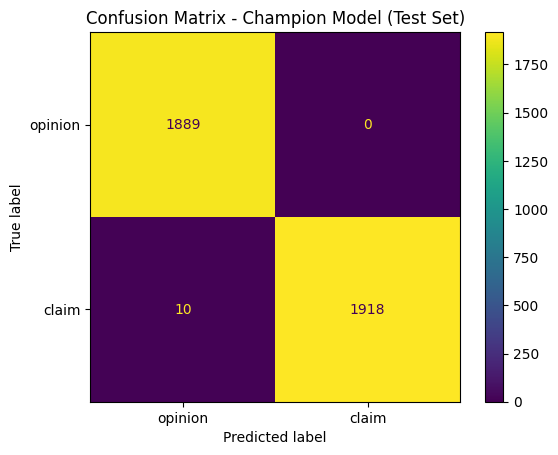

In [ ]:
# Compute values for confusion matrix
cm_test = confusion_matrix(y_test, y_test_preds)

# Create display of confusion matrix using ConfusionMatrixDisplay()
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['opinion', 'claim'])

# Plot confusion matrix
disp_test.plot(cmap='viridis')
plt.title("Confusion Matrix - Champion Model (Test Set)")

# Display plot
plt.show()



#### **Feature importances of champion model**


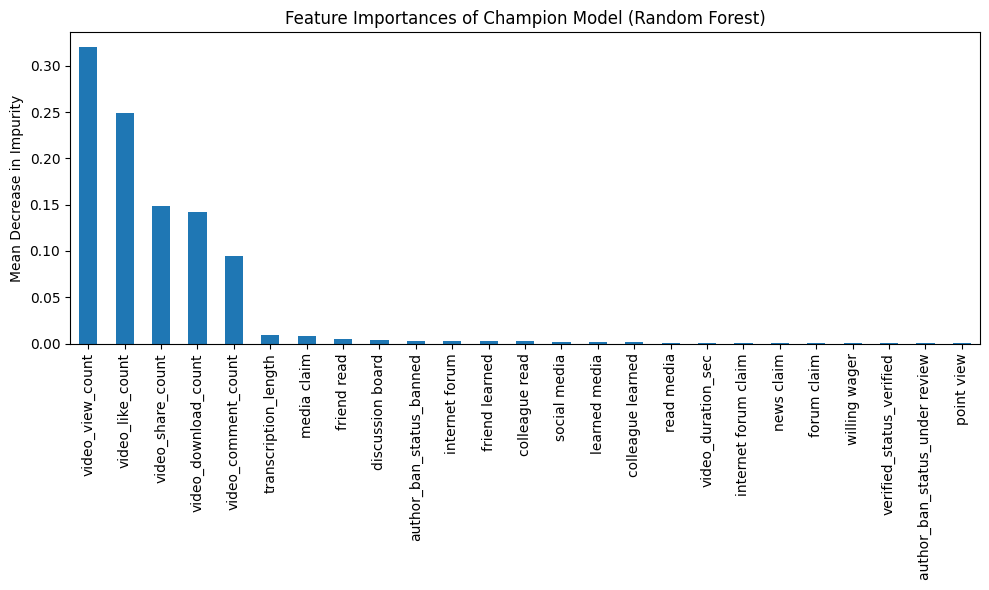

In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a pandas Series with feature names
rf_importances = pd.Series(importances, index=X_test_final.columns)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 6))
rf_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Feature Importances of Champion Model (Random Forest)')
ax.set_ylabel('Mean Decrease in Impurity')
plt.tight_layout()
plt.show()



**Question:** Describe your most predictive features. Were your results surprising?

The most predictive features in the Random Forest model were video_view_count, video_like_count, and video_share_count. These features, which reflect user engagement with the content, contributed the most to the model’s ability to distinguish between claims and opinions. This result suggests that videos identified as claims tend to attract more interaction from users, possibly due to their more controversial or provocative nature.

The importance of these engagement-based features was expected, given the nature of social media platforms like TikTok, where content that spreads quickly and broadly often contains bold or unverified information. However, it was somewhat surprising that metadata-related features like verified_status or author_ban_status were not significant contributors to the model. This indicates that the virality of the content is a stronger indicator of claim-like behavior than the profile of the content creator.

Overall, the results align with expectations around how misinformation can spread, but they also emphasize the limited role of user verification in predicting content type.

### **Task 8. Conclusion**




1. Would you recommend using this model? Why or why not?
Yes, I would recommend using this Random Forest model. It achieved very high performance metrics, including 99.7% accuracy and 99.2% recall on the test set, which means it is highly reliable at correctly identifying claims—the primary objective of this project. The model also performed consistently across training, validation, and test sets, indicating it generalizes well and is not overfitting.
2. What was your model doing? Can you explain how it was making predictions?
The model made predictions based on patterns in the input features, particularly video engagement metrics such as video_view_count, video_like_count, and video_share_count. These features had the highest importance scores, suggesting that videos with high engagement are more likely to be claims. This implies that the model associates viral content with potentially unverified or unsourced information. Surprisingly, author-related features such as verified_status or author_ban_status contributed very little to the model’s decision-making, indicating that the profile of the author was less relevant than the content’s impact.
3. Are there new features that you can engineer that might improve model performance?
Yes. While the current model already delivers outstanding results with the existing features, it could be further enhanced through advanced text-based feature engineering. For example:
-Sentiment polarity extracted from the video transcript;
-Use of specific keywords or phrases (e.g., “breaking,” “experts say,” “research shows”);
-Presence of numbers, dates, or references to sources;
-Detection of subjective vs. objective language.
These features could provide deeper insights into the nature of the spoken content and potentially help refine claim classification even further.
4. What features would you want to have that would likely improve the performance of your model?
Although the model already performs extremely well, access to more contextual metadata could further improve its robustness. Potential additions include:
-Time-based features, such as time of publication or rate of engagement (e.g., views per hour);
-Viewer engagement breakdown, including demographics or geographic location of viewers;
-Author history metrics, like frequency of posting or historical ratio of claims to opinions.
Such features could give the model broader context and support even more accurate differentiation between claims and opinions.
